<a href="https://colab.research.google.com/github/mithunglares/MobileAppUseCase/blob/main/Banking_MobileAppGooglePlayReiewsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Install the Pre-Required Modules***

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 286 kB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=f3aa0e84a6fbbdf754660ee5c681b438e2409be625ce75752ab68bf465410e3d
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


# ***Step 2: Import the required Modules***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all, reviews
applicationUrl="com.citi.citimobile"

# ***Step 3: Connecting to Google Play Store to pull comments from Users who gave Single * Rating***

1. Please note "com.bigbasket.mobileapp" is the id configured for Big Basket in this case. 
   You will need to have the respective Application ID configured based on your interest
2. ID can be obtained from Google Play Store, for Eg: "https://play.google.com/store/apps/details?id=com.bigbasket.mobileapp&hl=en-US"

In [14]:
result,continuation_token = reviews(
    applicationUrl,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=10000,# defaults to 100
    filter_score_with=1
    )


# ***Step 4: Analysing the data, please execute to understand the DataFrame structure***

In [15]:
df = pd.DataFrame.from_records(result)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  8689 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          7705 non-null   object        
 9   repliedAt             7705 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 781.4+ KB


## ***Step 5: Processing the Score for last 10,000 records of 1 star rating***

Analysis For Rating of 1 Star
crash:375
slowness:170
not responding:10
errors:518
payment issues:798
failed transactions:169
funds transactions:57
statement download issues:98
transfer transactions:170
upi issues:2
Total Count=10000 and Other Issues:7633


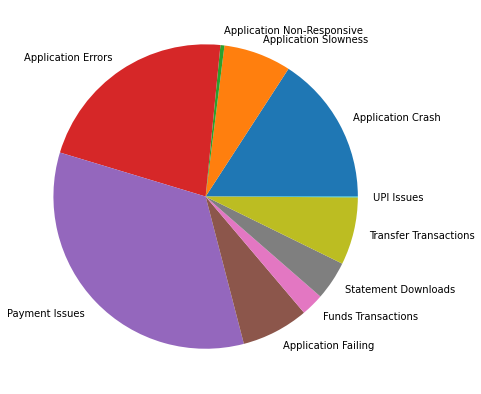

In [16]:
#df.info()
#df.head()
#print(df['score'].value_counts())
#df['score'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
total_count1=len(df)
crash_count1=(df["content"].str.count('crash').sum())
slow_count1=(df["content"].str.count('slow').sum())
not_responding1=(df["content"].str.count('responding').sum())
error_count1=(df["content"].str.count('error').sum())
payment_count1=(df["content"].str.count('payment').sum())
fail_count1=(df["content"].str.count('fail').sum())
funds_count1=(df["content"].str.count('fund').sum())
statement_count1=(df["content"].str.count('statement').sum())
transfer_count1=(df["content"].str.count('transfer').sum())
upi_count1=(df["content"].str.count('UPI').sum())
issues=['Application Crash', 'Application Slowness', 'Application Non-Responsive', 'Application Errors', 'Payment Issues', 'Application Failing','Funds Transactions','Statement Downloads','Transfer Transactions','UPI Issues']
data1=[crash_count1,slow_count1,not_responding1,error_count1,payment_count1,fail_count1,funds_count1,statement_count1,transfer_count1,upi_count1]
Sum1=sum(data1)


others1=total_count1-Sum1
print("Analysis For Rating of 1 Star")
print("crash:{}".format(crash_count1))
print("slowness:{}".format(slow_count1))
print("not responding:{}".format(not_responding1))
print("errors:{}".format(error_count1))
print("payment issues:{}".format(payment_count1))
print("failed transactions:{}".format(fail_count1))

print("funds transactions:{}".format(funds_count1))
print("statement download issues:{}".format(statement_count1))
print("transfer transactions:{}".format(transfer_count1))
print("upi issues:{}".format(upi_count1))
print("Total Count={} and Other Issues:{}".format(total_count1,others1))




fig = plt.figure(figsize =(10, 7))
plt.pie(data1, labels = issues)
plt.show()

In [6]:
for cnt, i in enumerate(result):
  print ("{} : {} : {} : {}".format(cnt,i['score'],i['content'],i['at']))


Streaming output truncated to the last 5000 lines.
5000 : 1 : Permission to access my photos and phone calls? Why???? I better use the phone to pay the card. : 2017-11-25 21:16:06
5001 : 1 : Asks for way too many permissions. : 2017-11-25 20:39:21
5002 : 1 : Wont ever take my mobile check deposits : 2017-11-24 22:18:32
5003 : 1 : Won't let me log in. I went so far as to shorten my very long password that I use for my computer so that I could use the app. But no matter what I do it will not accept my password and just keeps telling me it's having problems logging in. I've uninstalled it. I'll try it again another time I guess. Hope you can make it work Citibank. : 2017-11-24 19:34:59
5004 : 1 : Citi requires access to my files. Uninstall! : 2017-11-23 16:37:01
5005 : 1 : App isn't working... Again... : 2017-11-23 14:35:59
5006 : 1 : I keep trying to deposit my check and it keeps saying its having some problems. Always always does this : 2017-11-23 12:12:20
5007 : 1 : Only banking app I 

## ***Step 6: Processing the score for last 5,000 records of 2 star rating***

In [19]:
result2,continuation_token2 = reviews(
    applicationUrl,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=10000,# defaults to 100
    filter_score_with=2
    )
#result2, _ = reviews(
#    applicationUrl,
#    continuation_token=continuation_token2 # defaults to None(load from the beginning)
#)

df2 = pd.DataFrame.from_records(result2)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              5823 non-null   object        
 1   userName              5823 non-null   object        
 2   userImage             5823 non-null   object        
 3   content               5816 non-null   object        
 4   score                 5823 non-null   int64         
 5   thumbsUpCount         5823 non-null   int64         
 6   reviewCreatedVersion  5343 non-null   object        
 7   at                    5823 non-null   datetime64[ns]
 8   replyContent          2746 non-null   object        
 9   repliedAt             2746 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 455.0+ KB


In [21]:
for cnt, i in enumerate(result2):
  print ("{} : {} : {} : {}".format(cnt,i['score'],i['content'],i['at']))


Streaming output truncated to the last 5000 lines.
1459 : 2 : Works well but MUST be updated EVERY month :( You can't access your account until you do the update. 🤪 PITA if you're in a hurry! : 2020-04-10 01:10:39
1460 : 2 : The app works fine but im tired of updating : 2020-04-09 20:14:50
1461 : 2 : Horrendously slow updating : 2020-04-08 18:11:49
1462 : 2 : Average, trying to reset password is a pain. Does not recognize info to reset. If they don't recognize info that is a red flag. : 2020-04-08 16:15:57
1463 : 2 : External bank transfer not working : 2020-04-08 15:44:04
1464 : 2 : Just kept saying technical difficulties; try back later. I didn't appreciate having no choice whether to update or not; it was mandatory. And now the app totally sucks!! Way to go, Citi... : 2020-04-08 10:36:07
1465 : 2 : I've been requesting a response about a bill payment but no one has returned my call/ text : 2020-04-08 02:15:31
1466 : 2 : I dont like the sudden drop down or pop up menu selections ...v

Analysis For Rating of 2 Star
crash:329.0
slowness:298.0
not responding:5.0
errors:400.0
payment issues:634.0
failed transactions:105.0
funds transactions:400.0
statement download issues:634.0
transfer transactions:105.0
upi issues:0.0
Total Count=5823 and Other Issues:3763.0


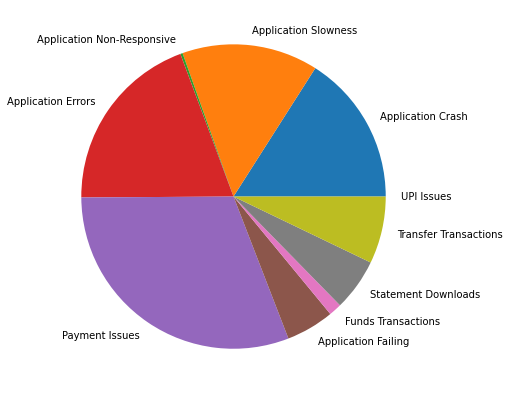

In [22]:
total_count2=len(df2)
crash_count2=(df2["content"].str.count('crash').sum())
slow_count2=(df2["content"].str.count('slow').sum())
not_responding2=(df2["content"].str.count('responding').sum())
error_count2=(df2["content"].str.count('error').sum())
payment_count2=(df2["content"].str.count('payment').sum())
#payment_count2=0
fail_count2=(df2["content"].str.count('fail').sum())
funds_count2=(df2["content"].str.count('fund').sum())
statement_count2=(df2["content"].str.count('statement').sum())
transfer_count2=(df2["content"].str.count('transfer').sum())
upi_count2=(df2["content"].str.count('UPI').sum())
data2=[crash_count2,slow_count2,not_responding2,error_count2,payment_count2,fail_count2,funds_count2,statement_count2,transfer_count2,upi_count2]

Sum2=sum(data2)
others2=total_count2-Sum2
print("Analysis For Rating of 2 Star")
print("crash:{}".format(crash_count2))
print("slowness:{}".format(slow_count2))
print("not responding:{}".format(not_responding2))
print("errors:{}".format(error_count2))
print("payment issues:{}".format(payment_count2))
print("failed transactions:{}".format(fail_count2))
print("funds transactions:{}".format(error_count2))
print("statement download issues:{}".format(payment_count2))
print("transfer transactions:{}".format(fail_count2))
print("upi issues:{}".format(upi_count2))

print("Total Count={} and Other Issues:{}".format(total_count2,others2))


fig2 = plt.figure(figsize =(10, 7))
plt.pie(data2, labels = issues)
 
# show plot
plt.show()

In [ ]:
#pip install azure-ai-textanalytics

### ***SENTIMENT ANALYSIS***

In [ ]:
#import azure 
#from azure.ai.textanalytics import TextAnalyticsClient
#from azure.core.credentials import AzureKeyCredential

###SIMPLE SCRIPT TO DOWNLOAD REVIEWS FROM GOOGLE PLAY FOR ANY APPLICATION